In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
Nside=10
g = np.random.normal(1,0.1,(Nside,Nside))*np.exp(1j*np.random.uniform(0,2*np.pi))
px = np.random.normal(0,0.3,(Nside,Nside)) 
py = np.random.normal(0,0.3,(Nside,Nside))
ofx = np.random.normal(0,0.02,(Nside,Nside))
ofy = np.random.normal(0,0.02,(Nside,Nside))
R=0.4

In [17]:
px[3,5]

0.0013514989542695473

In [37]:
((x+ofx[i,j])**2+(y+ofy[i,j])**2) > R**2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [117]:
def plot(M):
    mult = 20 if M<30 else 1
    Np = (2*M+1)*Nside
    pl = np.zeros((Np,Np), dtype=np.complex128)
    toplot = np.zeros((Np, Np, 3))
    for i in range(Nside):
        for j in range(Nside):
            Npost = (2*M+1)*mult
            x = np.outer(np.linspace(-0.5,0.5,Npost),np.ones(Npost))
            y = x.T
            postage = g[i,j]*np.exp(1j*((x)*px[i,j]+(y)*py[i,j]))
            postage[((x+ofx[i,j])**2+(y+ofy[i,j])**2)>R**2]=0
            for k in range(2*M+1):
                for l in range(2*M+1):
                    pl[i*(2*M+1)+k,j*(2*M+1)+l] = np.nanmean(postage[k*mult:(k+1)*mult,l*mult:(l+1)*mult])
    rl = np.real(pl)/abs(pl).max()
    im = np.imag(pl)/abs(pl).max()
    
#     for m in range(Np):
#         for n in range(Np):
#             if rl[m,n] != 0:
#                 toplot[m,n] = np.array([(rl[m,n]*3 + .5, 0, im[m,n]*.3 + .5)])
                
    #### THIS IS WRONG        
    toplot = np.array((rl**2,0*rl,im**2)).T
    beams = toplot.nonzero()
    toplot[beams] += .2
    print(toplot.shape)
    
    plt.imshow(toplot,extent=(0,1,0,1))
    #for i in range(Nside):
    #    for j in range(Nside):
    #        plt.plot((i+0.5),(j+0.5),'w+')
    
    return toplot
                

(410, 410, 3)


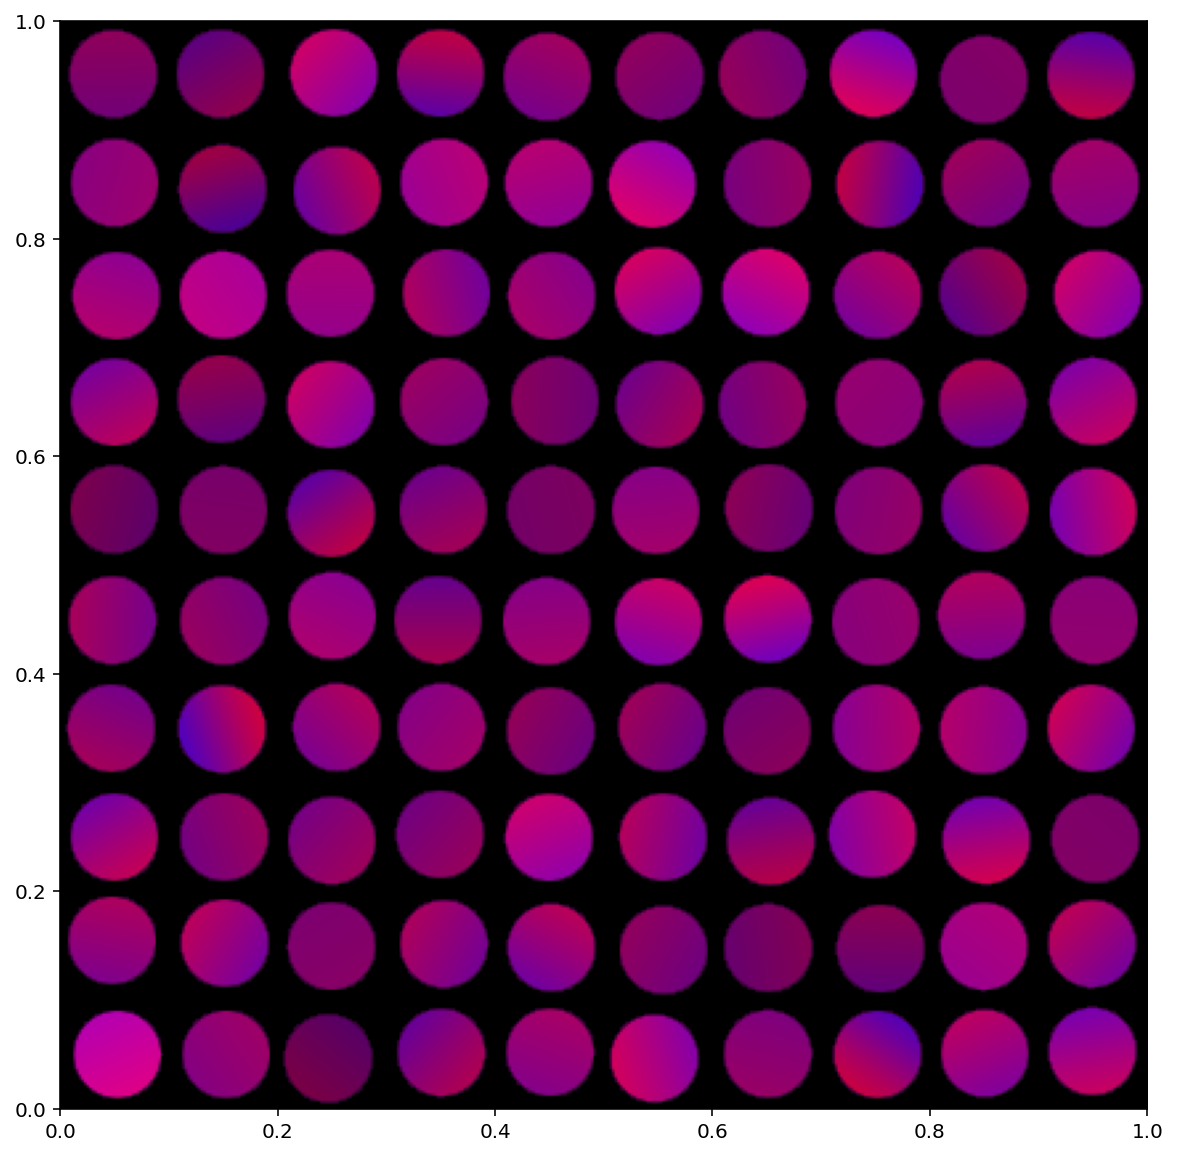

In [118]:
plt.figure(figsize=(10,10))
toplot=plot(20)